In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_data = pd.read_excel (r"C:\Users\MCSL-user\OneDrive\Data Sets for Machine Learning\Data Acquired - Sensor\0.1_Change_Drift_Fault_Samples\Training_Data_First.60(F)_Last.60(N).xlsx") #gets the data from PC
training_data.head() #Displays data - First 60% Drift fault - Last 60% Normal Data 

Max    Mean  Label
0  30.8  27.125      0
1  30.8  27.125      0
2  30.8  27.125      0
3  30.8  27.125      0
4  30.8  27.125      0

In [3]:
training_data.describe() #Returns the statistical summary of Numerical Data

Max        Mean       Label
count  120.000000  120.000000  120.000000
mean    28.246667   26.392850    0.500000
std      2.897258    1.104959    0.502096
min     25.100000   25.002000    0.000000
25%     25.400000   25.372000    0.000000
50%     28.400000   26.537500    0.500000
75%     30.900000   27.285000    1.000000
max     32.200000   28.525000    1.000000

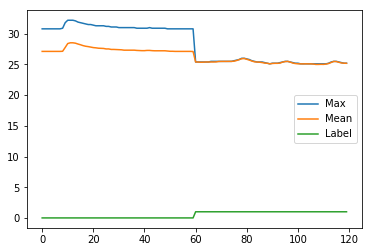

In [4]:
training_data.plot(kind='line')
plt.show() # First 60% Drift fault - Last 60% Normal Data - Total=120 Rows

In [5]:
ax = training_data[training_data['Label'] == 0][0:100].plot(kind='scatter', x='Max', y='Mean', color='DarkBlue', label='Faulty');
training_data[training_data['Label'] == 1][0:100].plot(kind='scatter', x='Max', y='Mean', color='Red', label='Normal', ax=ax);
plt.show()

In [6]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4) #40% of data for test

X_train = training_data[['Max','Mean']]
y_train = training_data[['Label']]

In [7]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train.values.ravel()) #.ravel() func. accepts values as 2D as 1D was expected by the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
testing_data = pd.read_excel (r"C:\Users\MCSL-user\OneDrive\Data Sets for Machine Learning\Data Acquired - Sensor\0.1_Change_Drift_Fault_Samples\Testing_Data_First.40(F)_Last.40(N).xlsx")
testing_data.describe()

Max       Mean      Label
count  80.000000  80.000000  80.000000
mean   28.045000  26.187275   0.500000
std     2.715353   0.901868   0.503155
min    25.000000  24.998000   0.000000
25%    25.200000  25.200000   0.000000
50%    28.300000  26.462500   0.500000
75%    30.700000  27.025000   1.000000
max    30.800000  27.125000   1.000000

In [9]:
X_test = testing_data[['Max','Mean']]
y_test = testing_data[['Label']]

In [10]:
svclassifier.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
y_pred = svclassifier.predict(X_test)

In [12]:
svclassifier.score(X_test, y_test) #Accuracy score 100%

1.0

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
#print(classification_report(y_test,y_pred))

[[40  0]
 [ 0 40]]


In [14]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [15]:
# Now we are gonna use Pickle or Joblib API which actually helps in not training the model each time we run the program.
import pickle

with open('SVM_Trained_Code_FaultDetection_PICKLE','wb') as f: #wb=write binary
    pickle.dump(svclassifier,f)

In [16]:
with open('SVM_Trained_Code_FaultDetection_PICKLE','rb') as f:
    SVM_prediction = pickle.load(f)

In [17]:
SVM_prediction.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
SVM_prediction.score(X_test, y_test)#We got same accuracy asw above, but using not training.Yahooo! :D

1.0

In [19]:
#Just for testing purposes
#[1] means Normal-Signal and [0] means Faulty-Signal
Max = 37
Mean = 28
test = [Max,Mean]
#print (test)
SVM_prediction.predict([test])

array([0], dtype=int64)

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc_score(y_test, y_pred)

1.0